In [ ]:
'''
回归任务：  1。 输入是一些数据 
           2。经过n层nn网络
           3。得出一个预测结果 
1，2，3步统称为回归任务
'''


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

In [36]:
features = pd.read_csv('data/temps.csv')
features.head()
print('数据维度:', features.shape)

数据维度: (348, 9)


In [37]:
years = features['year']
months = features['month']
days = features['day']
#datetime format
dates = [str(int(year)) + '-' + str(int(month)) +'-'+str(int(day)) for year, month, day in zip(years,months,days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
dates[:5]

[datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2016, 1, 2, 0, 0),
 datetime.datetime(2016, 1, 3, 0, 0),
 datetime.datetime(2016, 1, 4, 0, 0),
 datetime.datetime(2016, 1, 5, 0, 0)]

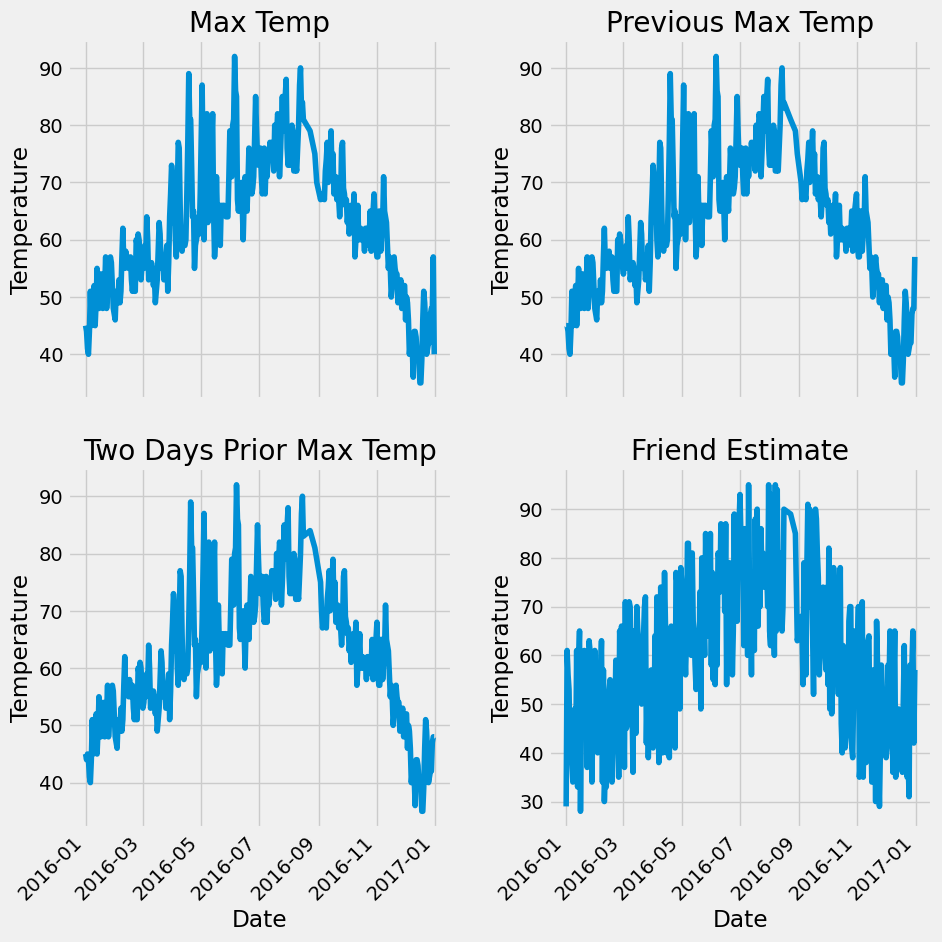

In [38]:
# 准备画图
# 指定默认风格
plt.style.use('fivethirtyeight')

# 设置布局
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (10,10))
fig.autofmt_xdate(rotation = 45)

# 标签值
ax1.plot(dates, features['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature'); ax1.set_title('Max Temp')

# 昨天
ax2.plot(dates, features['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature'); ax2.set_title('Previous Max Temp')

# 前天
ax3.plot(dates, features['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature'); ax3.set_title('Two Days Prior Max Temp')

# 我的逗逼朋友
ax4.plot(dates, features['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature'); ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)

In [39]:
#独热编码
features = pd.get_dummies(features)
features.head(5)

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,True,False,False,False,False,False,False
1,2016,1,2,44,45,45.7,44,61,False,False,True,False,False,False,False
2,2016,1,3,45,44,45.8,41,56,False,False,False,True,False,False,False
3,2016,1,4,44,41,45.9,40,53,False,True,False,False,False,False,False
4,2016,1,5,41,40,46.0,44,41,False,False,False,False,False,True,False


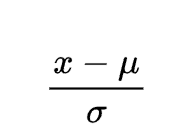

x-mean/std  -> 标准化数据 

In [41]:
# 标签
labels = np.array(features['actual'])
# 在特征中去掉标签
features_1 = features.drop('actual', axis = 1)

# 名字单独保存一下，以备后患
feature_list = list(features_1.columns)

# 转换成合适的格式
features_1 = np.array(features_1)

'''
标准化处理x-mean/std  -> 标准化数据 
'''
from sklearn import preprocessing
input_features = preprocessing.StandardScaler().fit_transform(features_1)

In [42]:
input_features[:5]

array([[ 0.        , -1.5678393 , -1.65682171, -1.48452388, -1.49443549,
        -1.3470703 , -1.98891668,  2.44131112, -0.40482045, -0.40961596,
        -0.40482045, -0.40482045, -0.41913682, -0.40482045],
       [ 0.        , -1.5678393 , -1.54267126, -1.56929813, -1.49443549,
        -1.33755752,  0.06187741, -0.40961596, -0.40482045,  2.44131112,
        -0.40482045, -0.40482045, -0.41913682, -0.40482045],
       [ 0.        , -1.5678393 , -1.4285208 , -1.48452388, -1.57953835,
        -1.32804474, -0.25855917, -0.40961596, -0.40482045, -0.40961596,
         2.47023092, -0.40482045, -0.41913682, -0.40482045],
       [ 0.        , -1.5678393 , -1.31437034, -1.56929813, -1.83484692,
        -1.31853195, -0.45082111, -0.40961596,  2.47023092, -0.40961596,
        -0.40482045, -0.40482045, -0.41913682, -0.40482045],
       [ 0.        , -1.5678393 , -1.20021989, -1.8236209 , -1.91994977,
        -1.30901917, -1.2198689 , -0.40961596, -0.40482045, -0.40961596,
        -0.40482045, -0.40

In [ ]:
#构造网络模型
x = torch.tensor(input_features, dtype=float)
y = torch.tensor(labels, dtype=float)

#权重参数初始化
weights = torch.randn((14,128), dtype=float, requires_grad=True)
biases = torch.randn(128, dtype = float, requires_grad=True)
weights2 = torch.randn((128,1), dtype=float, requires_grad=True)
biases2 = torch.randn(1, dtype=float, requires_grad=True)

learning_rate = 0.001
losses = []
#更新1000次，类似epoch概念？
for i in range(1000):
    #计算隐层
    '''x.mm - mat multiply矩阵乘法，计算x*W + b
    x (1,14) * weight(14,128) + b(128,1)
    '''
    hidden = x.mm(weights) + biases
    #加入激活函数-损失函数，计算损失
    hidden = torch.relu(hidden)
    #预测结果 
    predictions = hidden.m(weights2) + biases2
    #计算损失
    loss = torch.mean((predictions - y) **２)
    losses.append(loss.data.numpy())
    #打印损失值
    if i % 100 == 0:
        pritn('loss:', loss)
    #反向传播？为什么需要？不是说pytorch框架不需要反向传播吗？
    loss.backward()
    